In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('datasets/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


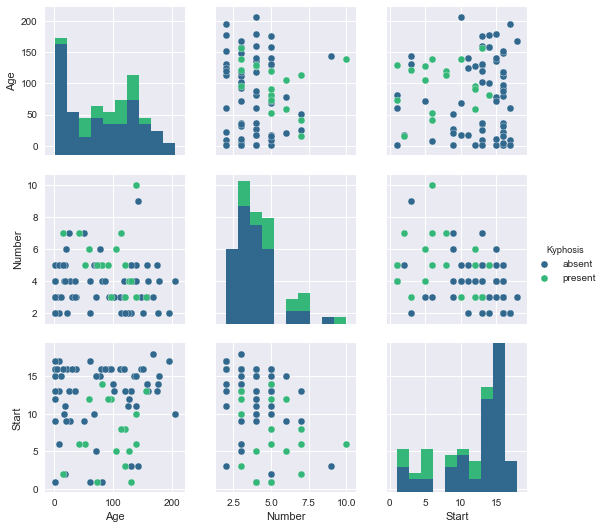

In [5]:
sns.pairplot(df,hue='Kyphosis',palette='viridis')

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
X=df.drop('Kyphosis',axis=1)

In [8]:
y=df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree=DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions=dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.80      0.76      0.78        21
    present       0.29      0.33      0.31         6

avg / total       0.69      0.67      0.68        27



In [16]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc=RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_pred=rfc.predict(X_test)

In [21]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.80      0.95      0.87        21
    present       0.50      0.17      0.25         6

avg / total       0.73      0.78      0.73        27



In [22]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

[[16  5]
 [ 4  2]]


[[20  1]
 [ 5  1]]


In [23]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

In [25]:
import pydot

In [26]:
features=list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [27]:
dot_data=StringIO()

In [30]:
#graphviz not installed
export_graphviz(dtree,out_file=dot_data,
                feature_names=features,filled=True,
               rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot.exe" not found in path.